In [10]:
import cv2
import matplotlib.pyplot as plt

In [16]:
from deepface import DeepFace

Directory  C:\Users\chira /.deepface created
Directory  C:\Users\chira /.deepface/weights created


In [92]:
img = cv2.imread("virat.jpg")

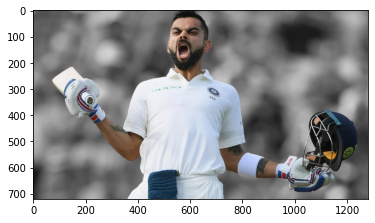

In [93]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [94]:
predictions = DeepFace.analyze(img, enforce_detection=False)


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.28it/s]


In [95]:
predictions

{'emotion': {'angry': 75.1709729229244,
  'disgust': 0.0011145549741859672,
  'fear': 24.761489062131755,
  'happy': 0.0005833396003622619,
  'sad': 0.06580573769925681,
  'surprise': 5.039633531460053e-06,
  'neutral': 2.9972002104395634e-05},
 'dominant_emotion': 'angry',
 'region': {'x': 508, 'y': 30, 'w': 136, 'h': 136},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.8768006227910519,
  'indian': 3.5533733665943146,
  'black': 0.25439602322876453,
  'white': 38.09608221054077,
  'middle eastern': 37.359437346458435,
  'latino hispanic': 19.859912991523743},
 'dominant_race': 'white'}

In [96]:
## wE TRY TO DRAW RECTANGLE ACCROOSS FACE

In [97]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [98]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [99]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
           predictions['dominant_emotion'],
           (20, 70),
           font,3,
           (0,0,255),
           2,
           cv2.LINE_4);

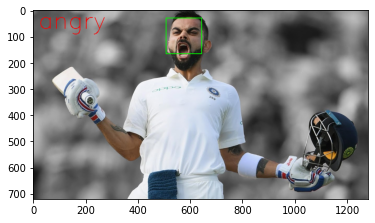

In [100]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## And we captured the aggresive look after century with DeepFace and opencv

### Real time detecting your emotion using webcam

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)
## Check if webcam opened correctly
if not cap.isOpened(0):
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions =['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    ## Drawing a rectangle around face to mark the detection by open cv
    for(w,x,y,z) in faces:
        cv2.rectagle(frame, (w,x), (w+y, x+z), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    ##USING PUT TEXT TO MARK EMOTION ON FACE
    cv2.putText(img,
           result['dominant_emotion'],
           (20, 70),
           font,3,
           (0,0,255),
           2,
           cv2.LINE_4);
    cv2.imshow('Original video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
        
cap.release()
cv2.destroyAllWindows()